# Support Vector Machines

In [1]:
import numpy as np                     # Llibreria matemática
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds          # Per carregar más facilment el dataset digits
import sklearn.model_selection as cv   # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
df = pd.read_csv('/content/drive/MyDrive/MD/Machine learning/Colab/cancerpatientdatasets.csv')
df = df.drop('index', axis=1)
df = df.drop('Patient Id', axis=1)
df.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
X = df.values[:, :-1]
Y = df.values[:,-1]

Separate the data into training (for adjusting parameters), and validation.

In [6]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, Y, test_size=.2, stratify = Y,random_state=1)

In [7]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear SVM

First we try an SVM with default parameters. Linear means that we are not using any kernel to move the data to a higher dimensional space.

In [9]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC()
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0


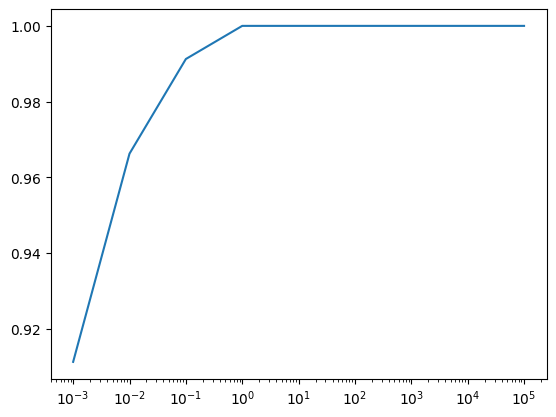

Acc. 10-fold cross on train data=  1.0

Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0

Best value of parameter C found:  {'C': 1.0}

Number of supports:  52 ( 2 of them have slacks)
Prop. of supports:  0.065


In [10]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C'])
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


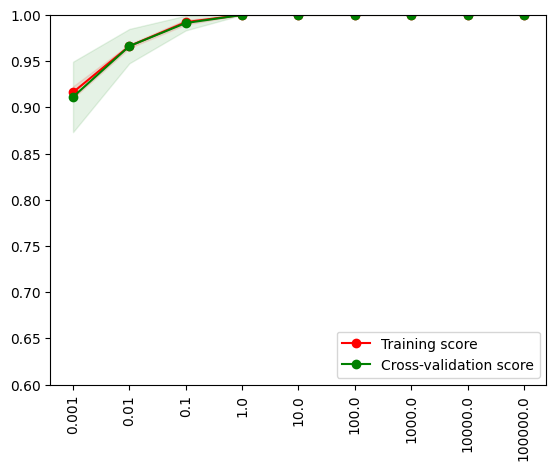

In [11]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

## Polynomial kernels

We try ploynomial kernel with degree 2 with default parameters.

In [12]:
knc = SVC(kernel='poly',degree =2)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0


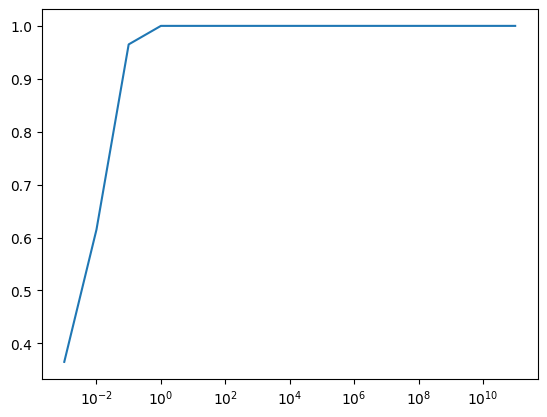

Acc. 10-fold cross on train data=  1.0

Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0

Best combination of parameters found:  {'C': 1.0}

Number of supports:  118 ( 53 of them have slacks)
Prop. of supports:  0.1475


In [13]:
Cs = np.logspace(-3, 11, num=15, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [14]:
knc = SVC(kernel='poly',degree =3)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0


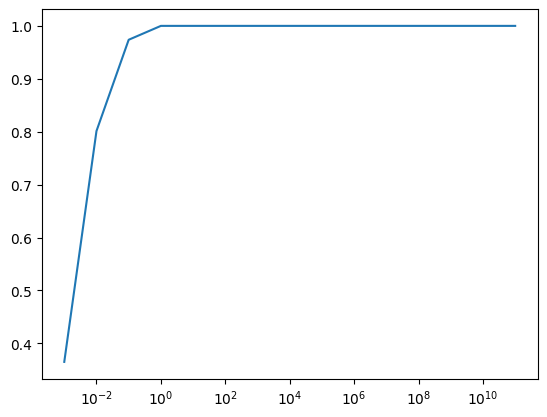

Acc. 10-fold cross on train data=  1.0

Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Best combination of parameters found:  {'C': 1.0}

Accuracy on test set:  1.0

Number of supports:  104 ( 36 of them have slacks)
Prop. of supports:  0.13


In [15]:
Cs = np.logspace(-3, 11, num=15, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF Kernel

In [16]:
knc = SVC()
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))


Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0


After trying with default parameters we search for the best parameters. In this case we have two parameters to adjust: the C parameter and the gamma parameter.

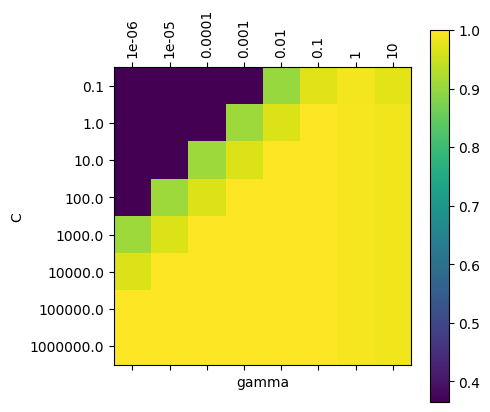


Best combination of parameters found:  {'C': 1.0, 'gamma': 0.1}

Acc. 10-fold cross on train data=  1.0


In [ ]:
# Values we will test for each parameter
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('\nAcc. 10-fold cross on train data= ', cvacc.mean())


This picture show for each combination of parameters the accuracy obtained in a 10-fold cross-validation.

In [ ]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Accuracy on test set:  1.0

Number of supports:  99 ( 22 of them have slacks)
Prop. of supports:  0.12375
